In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix

df = pd.read_csv('./data/diabetes_012_health_indicators_BRFSS2015.csv')

features = [
    'HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
    'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth',
    'PhysHlth', 'DiffWalk', 'Sex', 'Age'
]

cols_to_scale = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age']

df_processed = df[features + ['Diabetes_012']].copy()
df_processed['Diabetes_binary'] = df_processed['Diabetes_012'].apply(lambda x: 1 if x > 0 else 0)

scaler = StandardScaler()
df_processed[cols_to_scale] = scaler.fit_transform(df_processed[cols_to_scale])

X_cluster = df_processed[features].values
y_binary = df_processed['Diabetes_binary'].values


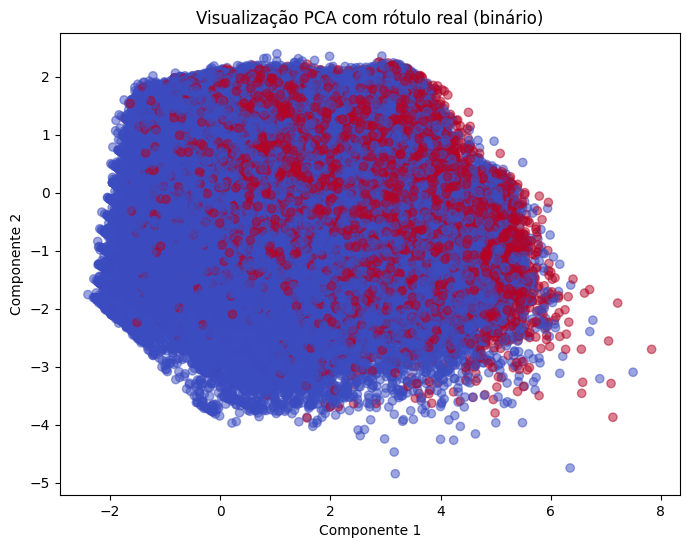

In [2]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_binary, cmap='coolwarm', alpha=0.5)
plt.title('Visualização PCA com rótulo real (binário)')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()


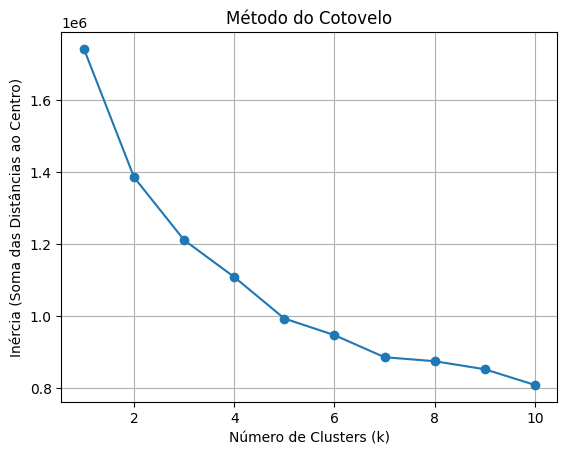

In [11]:
inertia = []
range_k = range(1, 11)

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

plt.plot(range_k, inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia (Soma das Distâncias ao Centro)')
plt.grid(True)
plt.show()

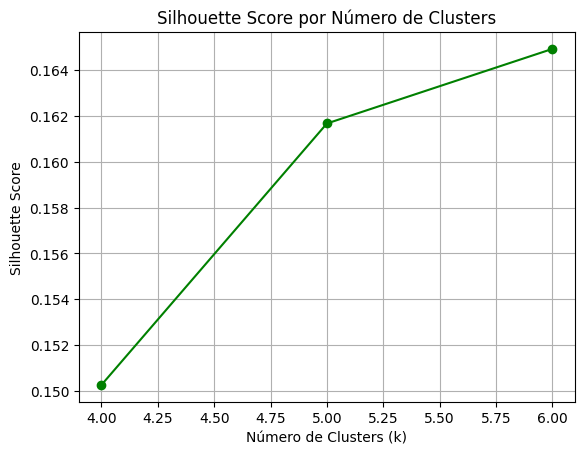

In [ ]:
sil_scores = []
range_k = range(2, 11)

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_cluster)
    score = silhouette_score(X_cluster, labels)
    sil_scores.append(score)

plt.plot(range_k, sil_scores, marker='o', color='green')
plt.title('Silhouette Score por Número de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

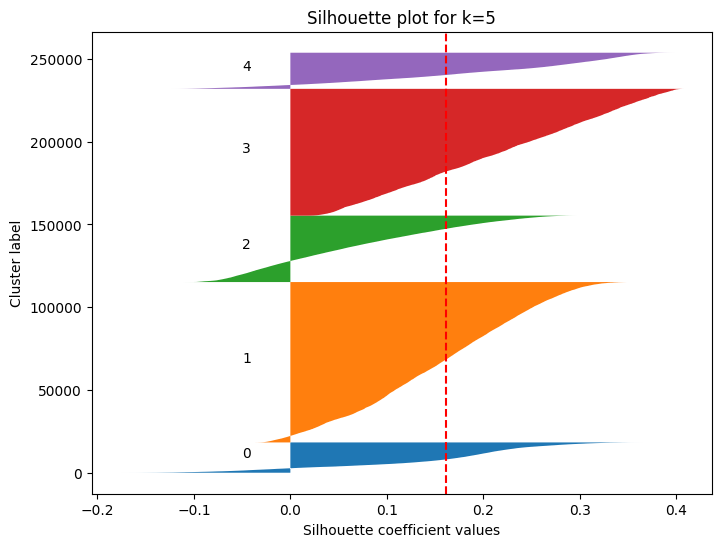

In [5]:
from sklearn.metrics import silhouette_samples

k = 5
kmeans_4 = KMeans(n_clusters=k, random_state=42)
cluster_labels_4 = kmeans_4.fit_predict(X_cluster)
silhouette_vals = silhouette_samples(X_cluster, cluster_labels_4)

plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(k):
    ith_cluster_silhouette_values = silhouette_vals[cluster_labels_4 == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper

plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.title(f"Silhouette plot for k={k}")
plt.axvline(x=silhouette_vals.mean(), color="red", linestyle="--")
plt.show()

In [14]:
optimal_k = 5  # ou outro valor escolhido após análise
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_cluster)

In [15]:
# Silhouette Score final
final_sil_score = silhouette_score(X_cluster, clusters)
print(f"Silhouette Score (k={optimal_k}): {final_sil_score:.3f}")

Silhouette Score (k=5): 0.162


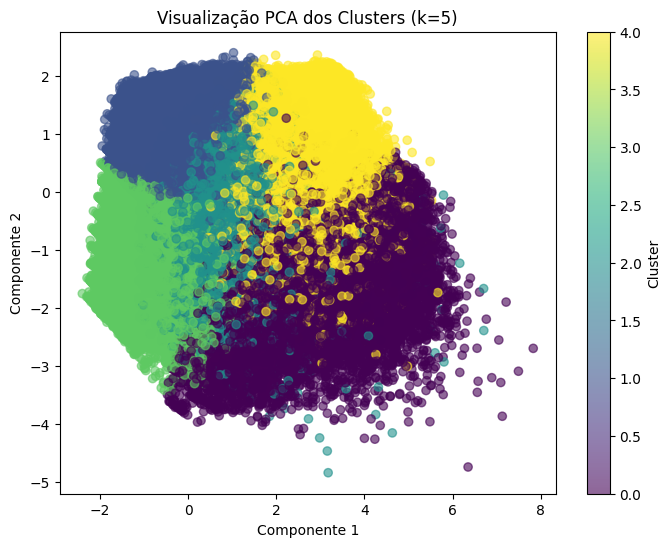

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title(f'Visualização PCA dos Clusters (k={optimal_k})')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(label='Cluster')
plt.show()

In [17]:
pd.crosstab(clusters, y_binary, rownames=['Cluster'], colnames=['Diabetes_binary'])


Diabetes_binary,0,1
Cluster,,
0,13614,4681
1,82113,14755
2,28405,11719
3,74727,1851
4,14844,6971


In [18]:
df_processed['cluster'] = clusters
cluster_profile = df_processed.groupby('cluster')[features + ['Diabetes_binary']].mean()
print(cluster_profile)

           HighBP  HighChol       BMI    Smoker    Stroke  \
cluster                                                     
0        0.539710  0.535993  0.248339  0.600273  0.086034   
1        0.529865  0.534645 -0.331882  0.488799  0.044070   
2        0.624913  0.508648  1.341994  0.440360  0.036960   
3        0.110619  0.170571 -0.392872  0.308796  0.004910   
4        0.645565  0.574100  0.176237  0.585652  0.118726   

         HeartDiseaseorAttack  PhysActivity    Fruits   Veggies  \
cluster                                                           
0                    0.162339      0.574802  0.533260  0.734190   
1                    0.112689      0.798871  0.684364  0.829500   
2                    0.100015      0.654371  0.534568  0.756505   
3                    0.007731      0.867024  0.657069  0.850584   
4                    0.247628      0.521109  0.599725  0.759432   

         HvyAlcoholConsump   GenHlth  MentHlth  PhysHlth  DiffWalk       Sex  \
cluster               

Silhouette Score (k=7): 0.149


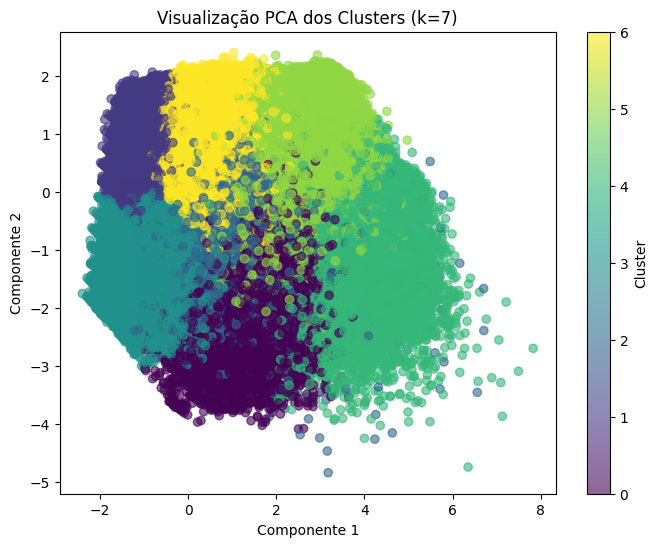

In [4]:
optimal_k = 7  # ou outro valor escolhido após análise
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_cluster)

# Silhouette Score final
final_sil_score = silhouette_score(X_cluster, clusters)
print(f"Silhouette Score (k={optimal_k}): {final_sil_score:.3f}")

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title(f'Visualização PCA dos Clusters (k={optimal_k})')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(label='Cluster')
plt.show()

In [5]:
pd.crosstab(clusters, y_binary, rownames=['Cluster'], colnames=['Diabetes_binary'])

Diabetes_binary,0,1
Cluster,,
0,10396,1876
1,65236,6279
2,18650,7352
3,60722,1561
4,6432,3530
5,13009,5952
6,39258,13427


In [6]:
df_processed['cluster'] = clusters
cluster_profile = df_processed.groupby('cluster')[features + ['Diabetes_binary']].mean()
print(cluster_profile)

           HighBP  HighChol       BMI    Smoker    Stroke  \
cluster                                                     
0        0.418025  0.439619  0.035137  0.548647  0.039684   
1        0.414962  0.455974 -0.321706  0.440187  0.022289   
2        0.600838  0.465964  1.789931  0.410392  0.029728   
3        0.107959  0.161489 -0.362618  0.292712  0.004415   
4        0.652279  0.623971  0.439562  0.643545  0.134210   
5        0.636886  0.565898  0.165577  0.580138  0.114287   
6        0.628300  0.578286 -0.168922  0.529506  0.069451   

         HeartDiseaseorAttack  PhysActivity    Fruits   Veggies  \
cluster                                                           
0                    0.082301      0.697441  0.550359  0.775831   
1                    0.057694      0.851695  0.706188  0.860756   
2                    0.075610      0.655488  0.538920  0.765057   
3                    0.006968      0.859609  0.642728  0.842011   
4                    0.244328      0.457338  0.5

c:\Users\edney\Desktop\Faculdade\projetos\pisi3\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\edney\Desktop\Faculdade\projetos\pisi3\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


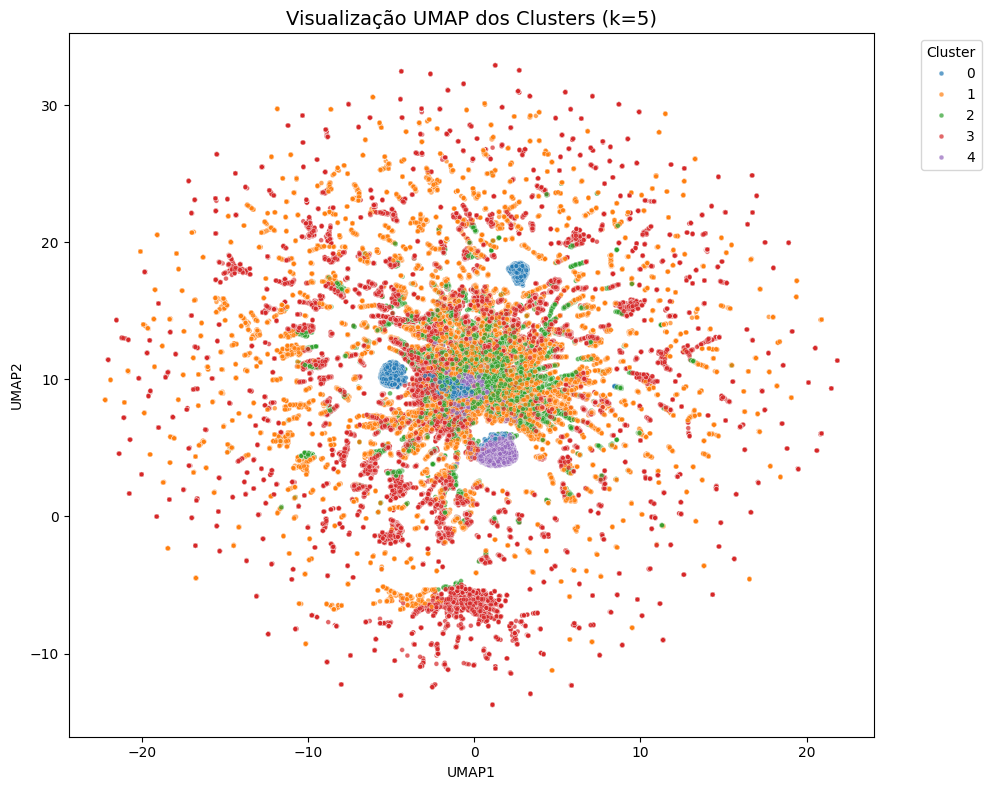

In [6]:
# 1. Imports necessários
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 2. Parâmetros:
# X: matriz de features padronizadas
# labels: array com os rótulos dos clusters (ex: kmeans.labels_)

# 3. Aplicando UMAP
reducer = umap.UMAP(
    n_neighbors=30,     # Explora uma estrutura mais ampla
    min_dist=0.1,       # Permite que os clusters se agrupem com mais clareza
    n_components=2,     # Visualização em 2D
    metric='euclidean',
    random_state=42     # Para resultados reprodutíveis
)

X_umap = reducer.fit_transform(X_cluster)

# 4. Organizando os dados para visualização
df_umap = pd.DataFrame({
    "UMAP1": X_umap[:, 0],
    "UMAP2": X_umap[:, 1],
    "Cluster": cluster_labels_4
})

# 5. Plotando o gráfico
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_umap,
    x="UMAP1", y="UMAP2",
    hue="Cluster",
    palette="tab10",
    s=12,
    alpha=0.7
)
plt.title("Visualização UMAP dos Clusters (k=5)", fontsize=14)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
